In [2]:
from pymongo import MongoClient
import matplotlib.pyplot as mp
import warnings
import os
import dotenv
warnings.filterwarnings('ignore')

In [4]:
host = "mongodb://localhost:27017/", #else

# we use the MongoClient to communicate with the running database instance.
myclient = MongoClient(host) #Mongo URI format

In [6]:
myclient.list_database_names()
db = myclient["newyork"]

## 1/

In [63]:
for doc in db.restaurants.find({"borough":"Brooklyn"}).limit(5):
    print(doc)

{'_id': ObjectId('68ef65e7f45788eeba2410ea'), 'address': {'building': '469', 'coord': {'type': 'Point', 'coordinates': [-73.961704, 40.662942]}, 'street': 'Flatbush Avenue', 'zipcode': '11225'}, 'borough': 'Brooklyn', 'cuisine': 'Hamburgers', 'grades': [{'date': datetime.datetime(2014, 12, 30, 0, 0), 'grade': 'A', 'score': 8}, {'date': datetime.datetime(2014, 7, 1, 0, 0), 'grade': 'B', 'score': 23}, {'date': datetime.datetime(2013, 4, 30, 0, 0), 'grade': 'A', 'score': 12}, {'date': datetime.datetime(2012, 5, 8, 0, 0), 'grade': 'A', 'score': 12}], 'name': "Wendy'S", 'restaurant_id': '30112340'}
{'_id': ObjectId('68ef65e7f45788eeba2410ec'), 'address': {'building': '2780', 'coord': {'type': 'Point', 'coordinates': [-73.98241999999999, 40.579505]}, 'street': 'Stillwell Avenue', 'zipcode': '11224'}, 'borough': 'Brooklyn', 'cuisine': 'American ', 'grades': [{'date': datetime.datetime(2014, 6, 10, 0, 0), 'grade': 'A', 'score': 5}, {'date': datetime.datetime(2013, 6, 5, 0, 0), 'grade': 'A', 's

In [62]:
for doc in db.restaurants.find({"borough":"Brooklyn", "cuisine":"Italian"}).limit(5):
    print(doc)

{'_id': ObjectId('68ef65e7f45788eeba241121'), 'address': {'building': '10004', 'coord': {'type': 'Point', 'coordinates': [-74.03400479999999, 40.6127077]}, 'street': '4 Avenue', 'zipcode': '11209'}, 'borough': 'Brooklyn', 'cuisine': 'Italian', 'grades': [{'date': datetime.datetime(2014, 2, 25, 0, 0), 'grade': 'A', 'score': 12}, {'date': datetime.datetime(2013, 6, 27, 0, 0), 'grade': 'A', 'score': 7}, {'date': datetime.datetime(2012, 12, 3, 0, 0), 'grade': 'A', 'score': 10}, {'date': datetime.datetime(2011, 11, 9, 0, 0), 'grade': 'A', 'score': 12}], 'name': 'Philadelhia Grille Express', 'restaurant_id': '40364305'}
{'_id': ObjectId('68ef65e7f45788eeba24114e'), 'address': {'building': '7201', 'coord': {'type': 'Point', 'coordinates': [-74.0166091, 40.6284767]}, 'street': '8 Avenue', 'zipcode': '11228'}, 'borough': 'Brooklyn', 'cuisine': 'Italian', 'grades': [{'date': datetime.datetime(2014, 12, 4, 0, 0), 'grade': 'A', 'score': 11}, {'date': datetime.datetime(2014, 2, 19, 0, 0), 'grade': 

In [ ]:
for doc in db.restaurants.find({"borough":"Brooklyn", "name": {"$regex":"/Pizza/i"}}).limit(10):
    print(doc) #for some reason it doesn't work here but it does in compass

In [59]:
for doc in db.restaurants.aggregate([
    {"$match":
        {"address.street": {"$regex": "^5 Avenue.*"}}
    },
    {"$count": 
        "NombreDeRestaurants"
    }
]):
    print(doc)

{'NombreDeRestaurants': 414}


In [64]:
for doc in db.restaurants.find({"borough":"Bronx", "grades.score": {"$lte": 1}}, {"name":1, "grades.score":1, "_id":0}).limit(5):
    print(doc) 

{'grades': [{'score': 8}, {'score': 6}, {'score': 0}, {'score': 0}], 'name': 'African Terrace'}
{'grades': [{'score': 11}, {'score': 10}, {'score': 2}, {'score': 0}], 'name': 'Beaver Pond'}
{'grades': [{'score': 3}, {'score': 2}, {'score': 0}, {'score': 9}, {'score': 12}, {'score': 7}], 'name': "Ljubo'S Pizzeria"}
{'grades': [{'score': 9}, {'score': 0}, {'score': 2}, {'score': 13}, {'score': 12}, {'score': 13}], 'name': "Zaro'S Bread Basket"}
{'grades': [{'score': 12}, {'score': 12}, {'score': 0}, {'score': 30}, {'score': 8}, {'score': 9}], 'name': "Joe'S Pizza"}


In [ ]:
a = list(db.restaurants.find({"name":"Bagels N Buns"}))[0]
print(f"Before: {a}")
db.restaurants.update_one({"name":"Bagels N Buns"},{"$set": {"address.street": "23 chemin du détour", "address.zipcode": "69100", "borough": "Villeurbanne"}})
print()
a = list(db.restaurants.find({"name":"Bagels N Buns"}))[0]
print(f"After: {a}")


Before: {'_id': ObjectId('68ef65e7f45788eeba241110'), 'address': {'building': '2491', 'coord': {'type': 'Point', 'coordinates': [-74.1459332, 40.6103714]}, 'street': 'Victory Boulevard', 'zipcode': '10314'}, 'borough': 'Staten Island', 'cuisine': 'Delicatessen', 'grades': [{'date': datetime.datetime(2015, 1, 9, 0, 0), 'grade': 'A', 'score': 3}, {'date': datetime.datetime(2013, 12, 5, 0, 0), 'grade': 'A', 'score': 10}, {'date': datetime.datetime(2013, 6, 19, 0, 0), 'grade': 'A', 'score': 10}, {'date': datetime.datetime(2013, 1, 8, 0, 0), 'grade': 'A', 'score': 11}], 'name': 'Bagels N Buns', 'restaurant_id': '40363427'}

After: {'_id': ObjectId('68ef65e7f45788eeba241110'), 'address': {'building': '2491', 'coord': {'type': 'Point', 'coordinates': [-74.1459332, 40.6103714]}, 'street': '23 chemin du détour', 'zipcode': '69100'}, 'borough': 'Villeurbanne', 'cuisine': 'Delicatessen', 'grades': [{'date': datetime.datetime(2015, 1, 9, 0, 0), 'grade': 'A', 'score': 3}, {'date': datetime.datetime

## 2/

In [5]:
db_tp = myclient["tour_pedia"]
for s in ["paris","amsterdam","london"]:
    db_tp[s]

In [7]:
for doc in db_tp.paris.find({ "services": {"$regex":"chinois.*"}, "category": "accommodation" }, {"name":1, "_id":0}).limit(5):
    print(doc) 

{'name': 'Shangri-La Hotel, Paris'}
{'name': 'Hôtel les Degrés de Notre Dame'}
{'name': 'Novotel Paris Tour Eiffel'}
{'name': 'Hyatt Regency Paris Etoile (ex Concorde Lafayette)'}
{'name': 'Novotel Paris Les Halles'}


In [25]:
paris_categories_nb = list(db_tp.paris.aggregate([
    {"$group":{
        "_id": "$category",
        "Total": {"$sum":1}
    }},
    {"$project":{
        "Category":"$_id",
        "Total":"$Total",
        "_id":0
    }},
    {"$sort":{"Total":-1}}
]))
l_cats = [doc["Category"] for doc in paris_categories_nb]
l_total = [doc["Total"] for doc in paris_categories_nb]
for doc in paris_categories_nb:
    print(doc) 

{'Category': 'poi', 'Total': 26846}
{'Category': 'restaurant', 'Total': 21823}
{'Category': 'attraction', 'Total': 4316}
{'Category': 'accommodation', 'Total': 3376}


<BarContainer object of 4 artists>

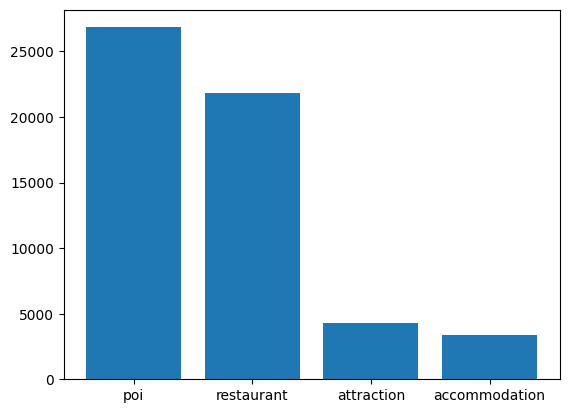

In [26]:
mp.bar(l_cats,l_total, width=0.8, bottom=None, align='center', )

## 3/ Cloud Connexion

In [5]:
dotenv_path = os.path.join(os.getcwd(), '.env')
dotenv.load_dotenv(dotenv_path)

HOST_URL = os.environ.get("HOST_URL")
CloudClient = MongoClient(HOST_URL) #Mongo URI format

CloudClient.list_database_names()

['sample_mflix', 'admin', 'local']